In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


# Extract Data

In [2]:
import pandas as pd
train_data=pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv', header=None)
test_data=pd.read_csv('/kaggle/input/data-science-london-scikit-learn/test.csv', header=None)
train_label=pd.read_csv('/kaggle/input/data-science-london-scikit-learn/trainLabels.csv', header=None)

display(train_data.shape)
display(test_data.shape)
display(train_label.shape)

train_data['Output']=train_label

display(train_data.head())
display(test_data.head())

(1000, 40)

(9000, 40)

(1000, 1)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Output
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


# EDA

In [3]:
# Checking NULL
print(train_data.isnull().sum())
print(test_data.isnull().sum())

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
Output    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64


In [4]:
# Checking datatypes
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9000 non-null   float64
 1   1       9000 non-null   float64
 2   2       9000 non-null   float64
 3   3       9000 non-null   float64
 4   4       9000 non-null   float64
 5   5       9000 non-null   float64
 6   6       9000 non-null   float64
 7   7       9000 non-null   float64
 8   8       9000 non-null   float64
 9   9       9000 non-null   float64
 10  10      9000 non-null   float64
 11  11      9000 non-null   float64
 12  12      9000 non-null   float64
 13  13      9000 non-null   float64
 14  14      9000 non-null   float64
 15  15      9000 non-null   float64
 16  16      9000 non-null   float64
 17  17      9000 non-null   float64
 18  18      9000 non-null   float64
 19  19      9000 non-null   float64
 20  20      9000 non-null   float64
 21  21      9000 non-null   float64
 22  

None

In [5]:
train_data['Output'].unique()

array([1, 0])

# Univariate Analysis

In [6]:
display(pd.concat([train_data.min(), train_data.max(), train_data.mean()], axis=1, keys=['min', 'max', 'mean']))
#test_data.describe()

,min,max,mean
0,-3.365711,3.326246,0.025596
1,-3.492086,3.583870,-0.024526
2,-2.695602,2.546507,-0.024088
3,-3.460471,3.088738,-0.002271
4,-16.421901,17.565345,1.092329
5,-3.041250,3.102997,-0.006250
6,-7.224761,7.592666,0.497342
7,-6.509084,7.130097,-0.037883
8,-3.145588,3.145258,0.026391
9,-2.749812,3.919426,-0.003597


In [7]:
#train_data.plot(kind='bar', subplots=True, layout=(1,41))

# Bivariate Analysis

<AxesSubplot:>

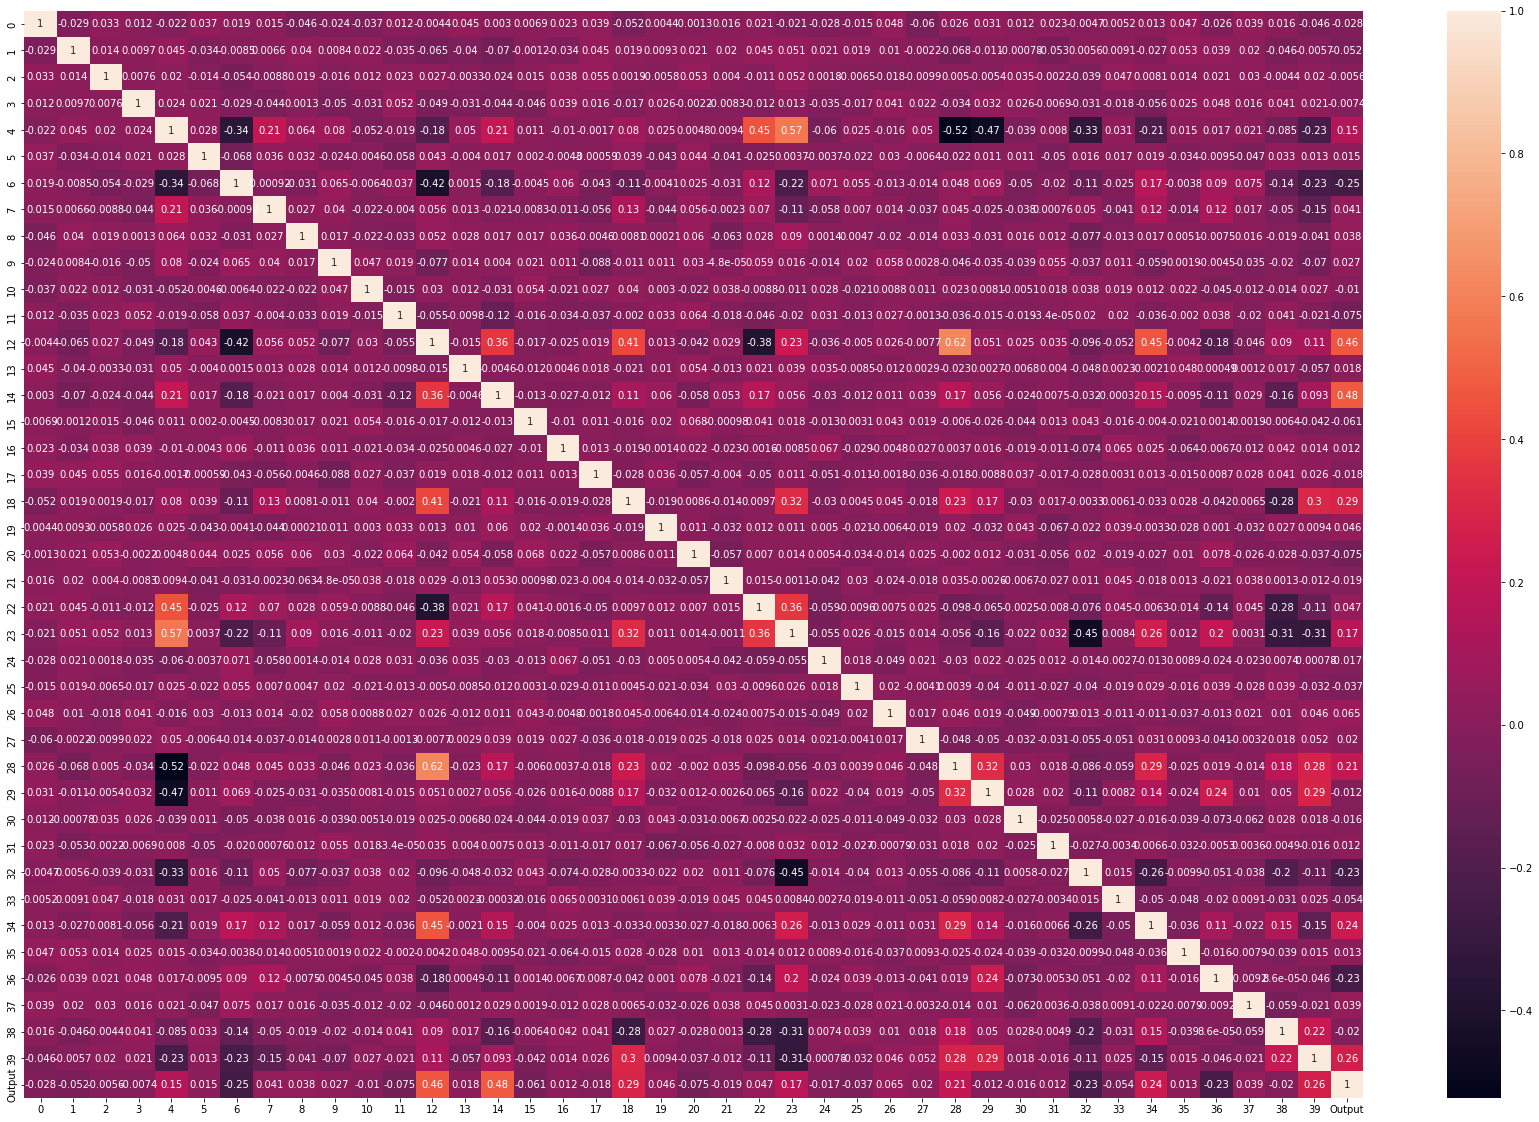

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
df=train_data.corr()
sns.heatmap(df, annot=True)

None of the input features is having high correlation with the output feature ie value > 0.6

# Outler Detection and Removal

In [9]:
train_data.iloc[:,:]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Output
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141,0
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567,1
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686,1
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='3'>

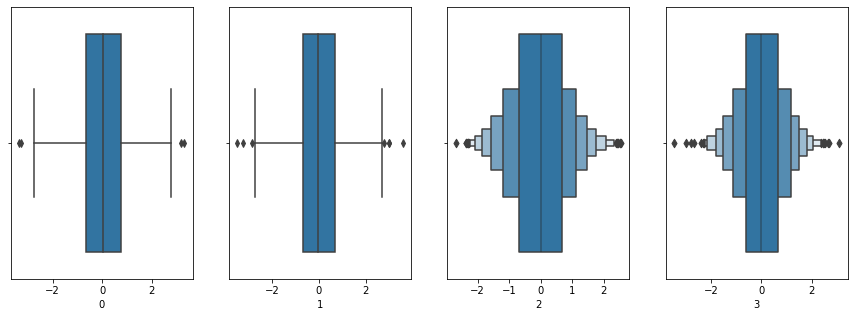

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
sns.boxplot(train_data[0])

plt.subplot(1,4,2)
sns.boxplot(train_data[1])

plt.subplot(1,4,3)
sns.boxenplot(train_data[2])

plt.subplot(1,4,4)
sns.boxenplot(train_data[3])

Outlier removal will take lot of time, proceeding ahead with Model which doesn't needs outliers removal.

In [11]:
x_train=train_data.drop('Output', axis=1)
y_train=train_data['Output']

from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

y_pred=pd.DataFrame(model.predict(test_data), columns=['Solution'])

import numpy as np
y_pred['Id']=np.arange(1,y_pred.shape[0]+1)

print(model.score(x_train, y_train))

print(y_pred[['Id', 'Solution']])
y_pred[['Id', 'Solution']].to_csv('submission.csv', index=False)

1.0
        Id  Solution
0        1         1
1        2         0
2        3         0
3        4         0
4        5         0
...    ...       ...
8995  8996         1
8996  8997         1
8997  8998         1
8998  8999         0
8999  9000         1

[9000 rows x 2 columns]
